In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

In [2]:
file1=Dataset("20180715_gemaq_file_1.nc","r",format="NETCDF3_CLASSIC")
file2=Dataset("20180715_gemaq_file_2.nc","r",format="NETCDF3_CLASSIC")
file3=Dataset("20180715_gemaq_file_3.nc","r",format="NETCDF3_CLASSIC")
file4=Dataset("20180715_gemaq_file_4.nc","r",format="NETCDF3_CLASSIC")

In [3]:
vars1 =file1.variables
dims1 =file1.dimensions

vars2 =file2.variables
dims2 =file2.dimensions

vars3 =file3.variables
dims3 =file3.dimensions

vars4 =file4.variables
dims4 =file4.dimensions

In [4]:
def print_keys(d):
    for k in d.keys():
        print(k,end=" ")
    print("")

In [5]:
print("File dimensions:")
print_keys(dims1)
print_keys(dims2)
print_keys(dims3)
print_keys(dims4)
print("\nFile variables:")
print_keys(vars1)
print_keys(vars2)
print_keys(vars3)
print_keys(vars4)

File dimensions:
lon lat level level0 time 
lon lat level level0 time 
lon lat level level0 time 
lon lat level level0 time 

File variables:
lon lat level level0 time O3H8 
lon lat level level0 time AVRNO2 AVRSO2 AVRPM10 
lon lat level level0 time MXO3 MXNO2 MXSO2 MXPM10 
lon lat level level0 time O3 NO2 SO2 PM10 


In [6]:
print(vars1['O3H8'])
print(vars4['O3'])

<class 'netCDF4._netCDF4.Variable'>
float32 O3H8(time, level0, lat, lon)
    long_name: OZON - stezenie - 8-godzinna srednia kroczaca
    units: ug/m3
    missing_data: -999.99
    missing_value: -999.99
unlimited dimensions: time
current shape = (3, 1, 161, 251)
filling off

<class 'netCDF4._netCDF4.Variable'>
float32 O3(time, level0, lat, lon)
    long_name: OZON - stezenie
    units: ug/m3
    missing_data: -999.99
    missing_value: -999.99
unlimited dimensions: time
current shape = (48, 1, 161, 251)
filling off



In [7]:
#średnia krocząca
o1=np.array(vars1['O3H8'][0][0])
#stężenie chwilowe
o2=np.array(vars4['O3'][0][0])


Wymiary w postaci (czas, poziom, lat, long)

In [8]:
print(vars1['O3H8'].shape)
print(vars4['O3'].shape)

(3, 1, 161, 251)
(48, 1, 161, 251)


Początek czasu

In [9]:
print(vars1['time'].units)
print(vars4['time'].units)

hours since 2018-07-15 00:00:00
hours since 2018-07-15 00:00:00


In [10]:
lon= np.array(vars4['lon'])
lat= np.array(vars4['lat'])

In [11]:
lat.shape

(161,)

In [12]:

plt.rcParams['figure.figsize'] = [20, 10]

Text(0,0.5,'lat')

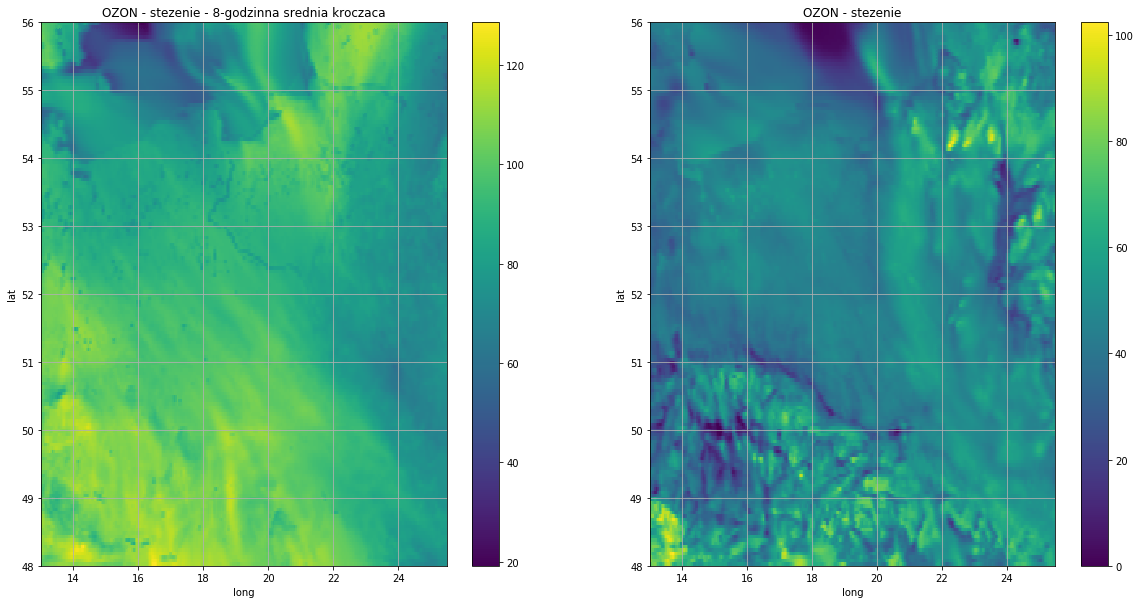

In [13]:
fig, ax = plt.subplots(1,2)
im1 = ax[0].pcolor(lon,lat,o1)
fig.colorbar(im1,ax=ax[0])
ax[0].title.set_text(vars1['O3H8'].long_name)
ax[0].grid(True)
ax[0].set_xlabel('long')
ax[0].set_ylabel('lat')
im1 = ax[1].pcolor(lon,lat,o2)

fig.colorbar(im1,ax=ax[1])
ax[1].title.set_text(vars4['O3'].long_name)
ax[1].grid(True)
ax[1].set_xlabel('long')
ax[1].set_ylabel('lat')

# Obliczanie względnej różnicy (stężenie chwilowe  - średnia/ średnia *100%)

In [14]:
O3_wzgl=((o2-o1)/o1)*100;

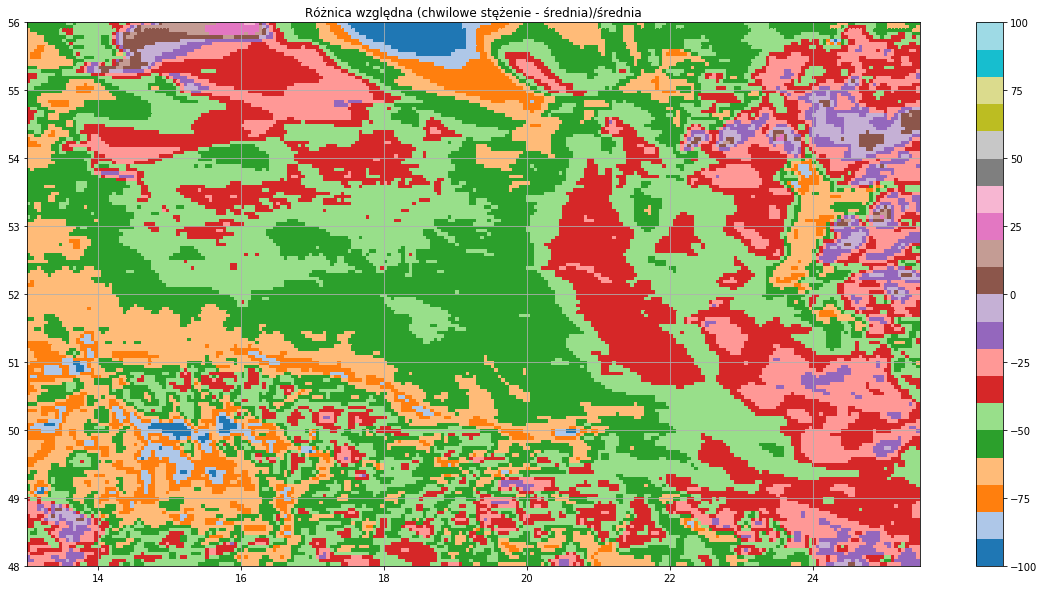

In [15]:
plt.pcolor(lon,lat,O3_wzgl,cmap='tab20')
plt.clim(-100,100)
plt.colorbar()
plt.title('Różnica względna (chwilowe stężenie - średnia)/średnia')
plt.grid(True)

# Przykładowe współrzędne (Warszawa)

In [16]:
p_lat=52.229833
p_lon=21.011963

In [17]:
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [18]:
p_idx_lat=find_nearest_idx(lat,p_lat)
p_idx_lon=find_nearest_idx(lon,p_lon)
print('Najbliższe współrzędne wg. siatki '+str(lat[p_idx_lat])+" "+str(lon[p_idx_lon]))

Najbliższe współrzędne wg. siatki 52.250004 21.00002


In [19]:
print("Stężenie chwilowe: "+str(o2[p_idx_lat][p_idx_lon]))
print("Średnia krocząca: "+str(o1[p_idx_lat][p_idx_lon]))
print("Względna różnica (chwilowa - śr)/śr: "+str(O3_wzgl[p_idx_lat][p_idx_lon])+" %")

Stężenie chwilowe: 60.88769
Średnia krocząca: 84.56954
Względna różnica (chwilowa - śr)/śr: -28.002813 %


In [20]:
ts=np.empty(vars4['O3'].shape[0])

In [21]:
#dla każdego kroku czasowego z danych współrzędnych
for i in range(vars4['O3'].shape[0]): 
    ts[i]=(vars4['O3'][i][0][p_idx_lat][p_idx_lon])

Text(0,0.5,'ug/m^3')

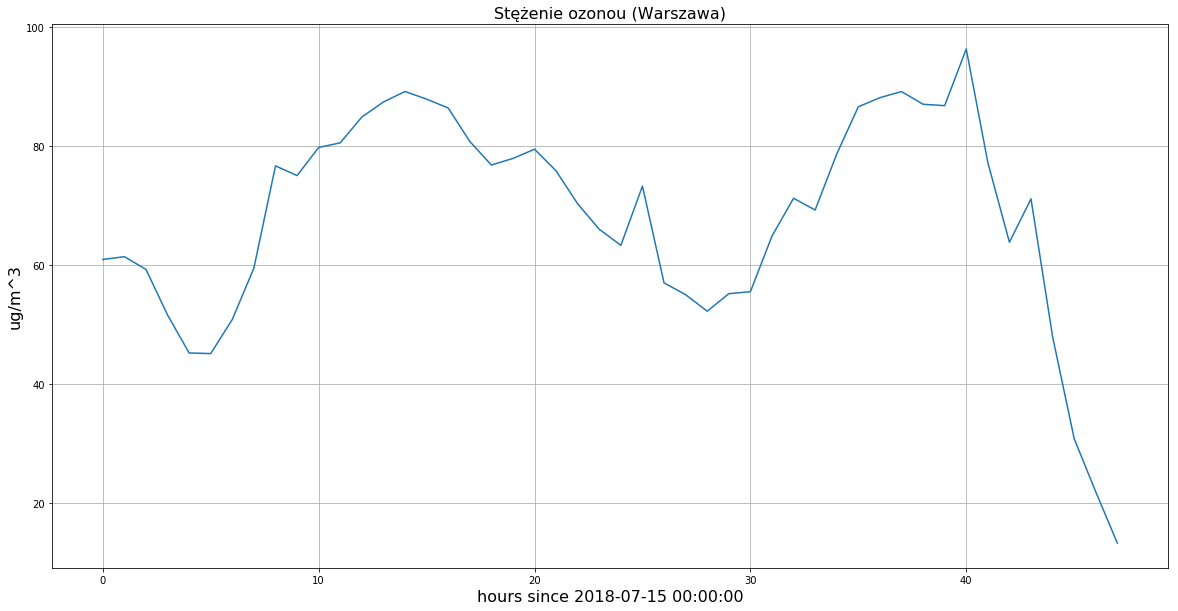

In [22]:
plt.plot(ts)
plt.grid(True)
plt.title('Stężenie ozonou (Warszawa)',fontsize=16)
plt.xlabel(vars4['time'].units,fontsize=16)
plt.ylabel('ug/m^3',fontsize=16)